2020-05-08 15:47:55,922 Initializing dataset PointNav-v1


datasetfile_path = data/datasets/pointnav/gibson/v1/train/train.json.gz
train: Len episodes:  4932479
TOTAL Len episodes:  4932479


2020-05-08 15:52:21,832 Initializing dataset PointNav-v1


datasetfile_path = data/datasets/pointnav/gibson/v2/train/train.json.gz
train: Len episodes:  3600000
TOTAL Len episodes:  3600000


2020-05-08 15:56:04,107 Initializing dataset ObjectNav-v1


datasetfile_path = data/datasets/objectnav/mp3d/v0/train/train.json.gz
train: Len episodes:  2740644
TOTAL Len episodes:  2740644


2020-05-08 16:05:47,778 Initializing dataset PointNav-v1
2020-05-08 16:05:47,803 Initializing dataset PointNav-v1
2020-05-08 16:05:47,823 Initializing dataset ObjectNav-v1
2020-05-08 16:05:47,868 Initializing dataset PointNav-v1
2020-05-08 16:05:47,971 Initializing dataset PointNav-v1


datasetfile_path = data/datasets/pointnav/gibson/v1/val_mini/val_mini.json.gz
val_mini: Len episodes:  30
TOTAL Len episodes:  30
datasetfile_path = data/datasets/pointnav/gibson/v2/val_mini/val_mini.json.gz
val_mini: Len episodes:  30
TOTAL Len episodes:  30
datasetfile_path = data/datasets/objectnav/mp3d/v0/val_mini/val_mini.json.gz
val_mini: Len episodes:  30
TOTAL Len episodes:  30
datasetfile_path = data/datasets/pointnav/gibson/v1/val/val.json.gz
val: Len episodes:  994
TOTAL Len episodes:  994
datasetfile_path = data/datasets/pointnav/gibson/v2/val/val.json.gz


2020-05-08 16:05:48,052 Initializing dataset ObjectNav-v1


val: Len episodes:  994
TOTAL Len episodes:  994
datasetfile_path = data/datasets/objectnav/mp3d/v0/val/val.json.gz
val: Len episodes:  2195
TOTAL Len episodes:  2195


OverflowError: cannot convert float infinity to integer

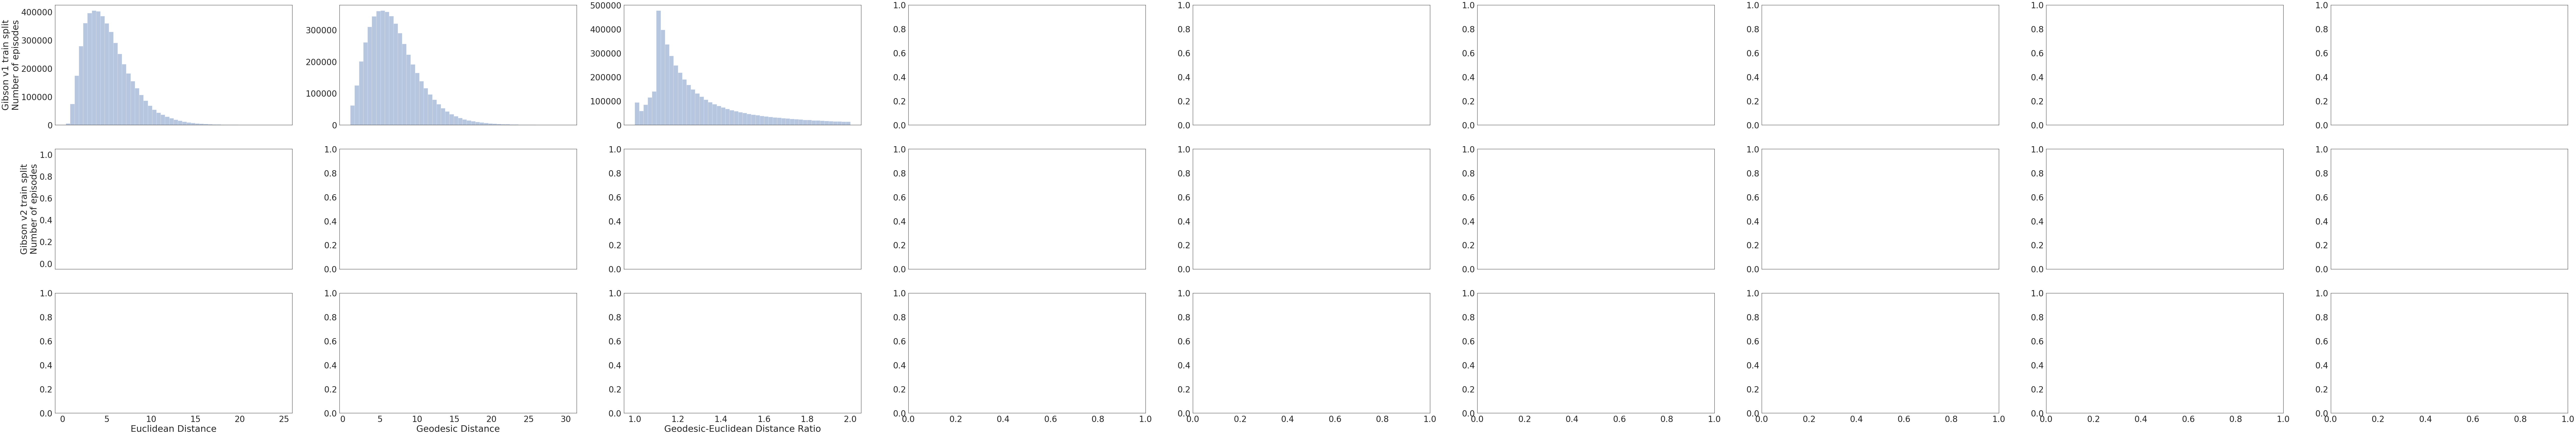

In [2]:
import os
os.chdir("/private/home/maksymets/habitat-api-pr") 
from habitat.datasets.pointnav.create.stats import *

In [ ]:
import habitat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import OrderedDict

dataset_configs = OrderedDict({
    # "Gibson v1": "configs/datasets/pointnav/gibson.yaml",
    # "Gibson v2": "configs/datasets/pointnav/gibson_v2.yaml",
    "MP3D objectnav v1": "configs/datasets/objectnav/mp3d.yaml",
    # "MP3D": "configs/pointnav/mp3d.yaml",
    # "SUNCG": "configs/pointnav/suncg.yaml",
})
# datasets = {name: load_dataset(config) for name, config in
#             dataset_configs.items()}
datasets = OrderedDict()
for split in ["val_mini", "val"]: # "train",   "test_challenge" "test_standard", ,"train" "test", "val_mini", "val", "test_challenge", "test_standard" "train" ,
    datasets.update({name + " " + split: load_dataset(config, [split]) for
                     name, config in dataset_configs.items()})
# datasets["Gibson test"] = load_dataset(dataset_configs["Gibson"]) # ["7LK038WEKH"]

sns.set(style='white', font_scale=3)
# f, ax = plt.subplots(figsize=(20, 20))

# import matplotlib.gridspec as gridspec
#
# fig = plt.figure(figsize=(11 * len(datasets.keys()), 36))
# outer = gridspec.GridSpec(1, 3, wspace=0.2, hspace=0.2)
#
# for i in range(3):
#     inner = gridspec.GridSpecFromSubplotSpec(2, 1,
#                                              subplot_spec=outer[i],
#                                              wspace=0.1, hspace=0.1)
#
#     for j in range(2):
#         ax = plt.Subplot(fig, inner[j])
#         t = ax.text(0.5, 0.5, 'outer=%d, inner=%d' % (i, j))
#         t.set_ha('center')
#         ax.set_xticks([])
#         ax.set_yticks([])
#         fig.add_subplot(ax)
n_plots = len(datasets.keys())
n_datasets = len(dataset_configs.keys())
n_splits_per_ds = len(datasets.keys()) // n_datasets

fig, axs = plt.subplots(nrows=max(n_datasets, 2), ncols=3 * n_splits_per_ds,
                        figsize=(20 * len(datasets.keys()), 30),
                        sharex='col',  # sharey='row'
                        #                            sharey=True) # , sharex=True
                        )


#     fig, axs = plt.subplots(nrows=n_datasets, ncols=3 * len(datasets.keys()) // n_datasets,
#                             figsize=(11 * len(datasets.keys()), 20),
#                             sharex='col', #sharey='row'
# #                            sharey=True) # , sharex=True
#                             )
# ylabel='Number of episodes'
# axs.set(ylabel='Number of episodes')
# for ax in axs:


for dataset_id, dataset_pair in enumerate(datasets.items()):
    column = (dataset_id // n_datasets) * 3
    axs[dataset_id % n_datasets][column].set_ylabel('{} split\nNumber of episodes'.format(dataset_pair[0]))
    sns.distplot(
        dataset_pair[1]["euclid_distance"],
        axlabel="Euclidean Distance",
        ax=axs[dataset_id % n_datasets][column],
        kde=False,
        norm_hist=False,

    )
    sns.distplot(
        dataset_pair[1]["geodesic_distance"],
        axlabel="Geodesic Distance",
        ax=axs[dataset_id % n_datasets][column + 1],
        kde=False,
        norm_hist=False,
    )
    sns.distplot(
        dataset_pair[1][dataset_pair[1]["ratio"] < 2]["ratio"],
        #    bins=30,
        #    hist=True,
        # axlabel="Geodesic-Euclidean Distance Ratio",
        #    label="WHAT",
        #    norm_hist=True,
        axlabel="",
        ax=axs[dataset_id % n_datasets][column + 2],
        kde=False,
        norm_hist=False,
    )

#     axs[n_datasets - 1][column].set_xlabel("Euclidean "
#                                                             "Distance")
#     axs[n_datasets - 1][column + 1].set_xlabel(
#         "Geodesic "
#                                                              "Distance")
#     axs[n_datasets - 1][column + 2].set_xlabel(
#         "Geodesic-Euclidean Distance "
#                                          "Ratio")
fig.tight_layout()
plt.show()

#plt.savefig("datasets/pointnav/analysis/output/splits_stats.png")


In [ ]:
def load_dataset(
    config_path="configs/datasets/pointnav/gibson.yaml",
    splits=["val", "train"],
):  # "train",
    config = habitat.get_config(config_path)

    episodes = []

    for split in splits:
        config.defrost()
        config.DATASET.SPLIT = split
        dataset = habitat.make_dataset(
            id_dataset=config.DATASET.TYPE, config=config.DATASET
        )
        print(config.DATASET.SPLIT + ": Len episodes: ", len(dataset.episodes))
        episodes += (
            dataset.episodes
        )  # json.loads(dataset.to_json())["episodes"]

    print("TOTAL Len episodes: ", len(episodes))

    d_episodes = list(
        map(
            lambda x: {
                "episode_id": int(x.episode_id),
                "scene_id": x.scene_id.split("/")[-1],
                "geodesic_distance": x.info["geodesic_distance"],
                "start_position": x.start_position,
                "goal_position": x.goals[0].position,
                "num_goals": len(x.goals),
                # "euclid_distance": x["info"]["euclid_distance"],
                # "distance_ratio": x["info"]["distance_ratio"],
                "euclid_distance": x.info["euclidean_distance"]
                if "euclidean_distance" in x.info
                else min(
                    [
                        np.power(
                            np.power(
                                np.array(
                                    np.array(x.start_position) - goal.position
                                ),
                                2,
                            ).sum(0),
                            0.5,
                        )
                        for goal in x.goals
                    ]
                ),
            },
            episodes,
        )
    )
    # print(d_episodes)
    ep_df = pd.DataFrame(
        d_episodes,
        columns=[
            "episode_id",
            "scene_id",
            "geodesic_distance",
            "difficulty",
            "start_position",
            "goal_position",
            "euclid_distance",
        ],
    )
    ep_df["ratio"] = ep_df["geodesic_distance"] / ep_df["euclid_distance"]
    return ep_df


In [29]:
config_path="configs/datasets/objectnav/mp3d.yaml"
splits=["train", "val", "test_standard"]
config = habitat.get_config(config_path)

episodes = []

for split in splits:
    config.defrost()
    config.DATASET.SPLIT = split
    dataset = habitat.make_dataset(
        id_dataset=config.DATASET.TYPE, config=config.DATASET
    )
    print(config.DATASET.SPLIT + ": Len episodes: ", len(dataset.episodes))
    episodes += (
        dataset.episodes
    )  # json.loads(dataset.to_json())["episodes"]

len(episodes)

2020-05-08 16:52:18,338 Initializing dataset ObjectNav-v1


datasetfile_path = data/datasets/objectnav/mp3d/v0/train/train.json.gz


2020-05-08 16:59:32,184 Initializing dataset ObjectNav-v1


train: Len episodes:  2740644
datasetfile_path = data/datasets/objectnav/mp3d/v0/val/val.json.gz


2020-05-08 16:59:33,987 Initializing dataset ObjectNav-v1


val: Len episodes:  2195
datasetfile_path = data/datasets/objectnav/mp3d/v0/test-std/test-std.json.gz


FileNotFoundError: [Errno 2] No such file or directory: 'data/datasets/objectnav/mp3d/v0/test-std/test-std.json.gz'

In [30]:
#episodes[0].goals
# config.defrost()
# config.DATASET.SPLIT = "test_standard"
# dataset = habitat.make_dataset(
#     id_dataset=config.DATASET.TYPE, config=config.DATASET
# )
# print(config.DATASET.SPLIT + ": Len episodes: ", len(dataset.episodes))
# episodes += (
#     dataset.episodes
# )  # j

goals = [
    {
       "object_id": goal.object_id,
        "object_name": goal.object_name,
        "object_category": goal.object_category,
        "episode_id": x.scene_id.split("/")[-1] + "_" + x.episode_id,
        "scene_id": x.scene_id.split("/")[-1],
        "geodesic_distance": x.info["geodesic_distance"],
        "start_position": x.start_position,
        "goal_position": x.goals[0].position,
        "num_goals": len(x.goals),
        # "euclid_distance": x["info"]["euclid_distance"],
        # "distance_ratio": x["info"]["distance_ratio"],
        "euclid_distance": x.info["euclidean_distance"]        
    
    } for x in episodes for goal in x.goals        
]
goals_dict = {f"{g['scene_id']}_{g['object_name']}" : g for g in goals}
#goals[:5]
print(f"goals {len(goals)} vs uniq goals {len(goals_dict)}")
print(f"Avg {float(len(goals))/len(episodes)} object instances per episode")
uniq_goals_df = pd.DataFrame(
    goals_dict,

).T
print(f"Instances per object_category  {uniq_goals_df.groupby(['object_category']).count()['object_id'].mean()}")
print(f"Instances per scene  {uniq_goals_df.groupby(['scene_id']).count()['object_id'].mean()}")

2020-05-08 17:02:48,302 Initializing dataset ObjectNav-v1


datasetfile_path = data/datasets/objectnav/mp3d/v0/test_standard/test_standard.json.gz
test_standard: Len episodes:  1799
goals 52180861 vs uniq goals 8349
Avg 19.01192834902089 object instances per episode
Instances per object_category  397.57142857142856
Instances per scene  105.68354430379746
